Input: history speed data, road features from dataset
Output: road profile data to (4)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [1]:
root_path = '../dataset/'

In [ ]:
#Road features
file_path = root_path + "Road/Roadfeature.txt"
road_ftr = pd.read_csv(file_path, sep='\s+',header=None)

Road Segment ID, Length of a road segment, Number of Lanes, Speed constraint, Direction, Level, Tortuosity, Number of connections, Schools, Companies & Offices, Banks & ATMs, Malls & Shopping, Restaurants, Gas stations & Vehicle services, Scenic spot, Hotels & Residences, Transportations, Entertainments & Living Services, sum of POIs.

In [ ]:
# z_matrix = road_ftr.loc[:,1:]
road_ftr.columns =['r_id', 'length','lane','max_spd','dir','level','tor','n_cn','school','ofc','bnk','mall','rest','gas_st','spot','hotel','trans','living_ser','sum_poi']

In [ ]:
high_way_ftr = road_ftr[road_ftr['level'] <=1]
major_road_ftr = road_ftr[road_ftr['level'] ==2]
small_road_ftr = road_ftr[road_ftr['level'] >=3]

In [ ]:
#@title Real time Speed
#workday
file_path = root_path + "Speed/20130912.speed"
data_12 = pd.read_csv(file_path, sep='\s+',header=None)
data_12.columns = ['r_id','time','v','dv','n']

file_path = root_path + "Speed/20130913.speed"
data_13 = pd.read_csv(file_path, sep='\s+',header=None)
data_13.columns = ['r_id','time','v','dv','n']

#holyday
file_path = root_path + "Speed/20130914.speed"
data_14 = pd.read_csv(file_path, sep='\s+',header=None)
data_14.columns = ['r_id','time','v','dv','n']

file_path = root_path + "Speed/20130915.speed"
data_15 = pd.read_csv(file_path, sep='\s+',header=None)
data_15.columns = ['r_id','time','v','dv','n'];

In [ ]:
high_way_ftr.head()

,r_id,length,lane,max_spd,dir,level,tor,n_cn,school,ofc,bnk,mall,rest,gas_st,spot,hotel,trans,living_ser,sum_poi
129,129,460.532158,1,8.333333,0,1,1.005370,4,0,0,0,0,0,0,0,0,0,0,0
130,130,411.439939,2,30.555556,0,0,1.000000,2,0,0,0,0,0,0,0,0,0,0,0
131,131,419.201938,2,30.555556,0,0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0
179,179,668.251186,2,30.555556,0,0,1.000559,2,0,0,0,0,0,0,0,0,0,0,0
180,180,660.378796,2,30.555556,0,0,1.000547,2,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
history_speed_workday.shape

(8558143, 5)

In [ ]:
time_id = list(range(48,133,1))

In [ ]:
history_speed_workday = history_speed_workday[history_speed_workday['time'].isin(time_id)]

In [ ]:
history_speed_workday

,r_id,time,hv,hdv,hn
2151845,2,48,8.828940,6.169488,4
2151846,3,48,5.092275,0.529370,4
2151847,4,48,8.894114,5.668308,23
2151848,6,48,0.472230,0.952156,6
2151849,7,48,9.177182,4.741260,112
...,...,...,...,...,...
5897515,81588,102,6.211307,1.915364,5
5897516,81589,102,13.303585,5.229629,14
5897517,81590,102,17.445284,1.632068,6
5897518,81591,102,10.162887,5.200148,15


In [ ]:
# history_speed_workday.to_csv('./output/new_history_speed_workday.csv')

<AxesSubplot:>

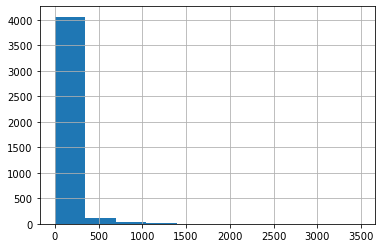

In [ ]:
# speed_h_high.head()
# print(speed_h_high['hn'].describe())
speed_h_high['hn'].value_counts().hist()

<AxesSubplot:>

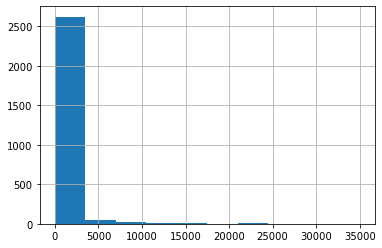

In [ ]:
# print(speed_h_major['hn'].describe())
# print(speed_h_major['hn'].max())
speed_h_major['hn'].value_counts().hist()

count    2.214554e+06
mean     5.330281e+01
std      1.236271e+02
min      3.000000e+00
25%      7.000000e+00
50%      1.500000e+01
75%      4.500000e+01
max      5.355000e+03
Name: hn, dtype: float64


<AxesSubplot:>

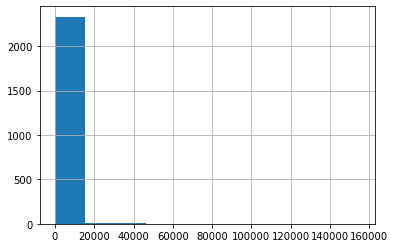

In [ ]:
# speed_h_small.head()
print(speed_h_small['hn'].describe())
speed_h_small['hn'].value_counts().hist()

In [ ]:
high_way_profile = high_way_ftr.copy()

In [ ]:
high_way_profile = high_way_profile.merge(speed_h_high, on='r_id', how='left')

In [ ]:
high_way_profile.to_csv('./output_files/high_way_profile.csv')

In [ ]:
major_road_profile.to_csv('./output_files/major_road_profile.csv')

In [ ]:
small_road_profile.to_csv('./output_files/small_road_profile.csv')